# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Yoni Tribber
- **Email:** tribberyoni5@gmail.com
- **ID Dicoding:** yonitribber

## Menentukan Pertanyaan Bisnis

- Produk apa yang menjadi terlaris?
- Bagaimana tren penjualan bulanan?

## Import Semua Packages/Library yang Digunakan

In [2]:
import os
import gdown
import zipfile
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

## Data Wrangling

### Gathering Data

In [3]:
os.path.exists("E-Commerce Public Dataset")

False

In [4]:
path = 'E-Commerce Public Dataset'

if not os.path.exists(path):
    file_path = 'E-Commerce Public Dataset.zip'
    url = 'https://drive.google.com/file/d/1MsAjPM7oKtVfJL_wRp1qmCajtSG1mdcK/view?usp=sharing'
    gdown.download(url, file_path, quiet=False,fuzzy=True)

    with zipfile.ZipFile(file_path, 'r') as zip_ref:
        zip_ref.extractall('./')
        
    os.remove(file_path)

Downloading...
From (original): https://drive.google.com/uc?id=1MsAjPM7oKtVfJL_wRp1qmCajtSG1mdcK
From (redirected): https://drive.google.com/uc?id=1MsAjPM7oKtVfJL_wRp1qmCajtSG1mdcK&confirm=t&uuid=0502b343-d419-413e-806c-bdc504b7b0fd
To: d:\Koding\Laskar AI\Belajar Analisis Data dengan Python\E-Commerce Public Dataset.zip
100%|██████████| 44.9M/44.9M [00:16<00:00, 2.71MB/s]


In [5]:
# Merge Dataset
df_customers = pd.read_csv('E-Commerce Public Dataset/customers_dataset.csv')
df_order_items = pd.read_csv('E-Commerce Public Dataset/order_items_dataset.csv')
df_order_payments = pd.read_csv('E-Commerce Public Dataset/order_payments_dataset.csv')
df_order_reviews = pd.read_csv('E-Commerce Public Dataset/order_reviews_dataset.csv')
df_orders = pd.read_csv('E-Commerce Public Dataset/orders_dataset.csv')
df_product_category = pd.read_csv('E-Commerce Public Dataset/product_category_name_translation.csv')
df_products = pd.read_csv('E-Commerce Public Dataset/products_dataset.csv')
df_sellers = pd.read_csv('E-Commerce Public Dataset/sellers_dataset.csv')

df_geolocation = pd.read_csv('E-Commerce Public Dataset/geolocation_dataset.csv')

In [6]:
df = pd.merge(df_orders, df_customers, on='customer_id', how='inner')
df = pd.merge(df, df_order_items, on='order_id', how='inner')
df = pd.merge(df, df_products, on='product_id', how='inner')
df = pd.merge(df, df_product_category, on='product_category_name', how='inner')
df = pd.merge(df, df_sellers, on='seller_id', how='inner')
df = pd.merge(df, df_order_payments, on='order_id', how='inner')
df = pd.merge(df, df_order_reviews, on='order_id', how='inner')

df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,1,credit_card,1,18.12,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,3,voucher,1,2.00,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,2,voucher,1,18.59,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,1,boleto,1,141.46,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,1,credit_card,3,179.12,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58


In [7]:
df.shape

(115609, 40)

**Insight:**
- Terdapat beberapa dataset yang digunakan seperti data pembelian customer hingga lokasi pembeli dan penjual
- Jumlah data sebelum proses cleaning terdapat sebanyak lebih dari 100k
- Setelah proses penggabungan, jumlah kolom menjadi sebanyak 40 kolom

### Assessing Data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115609 entries, 0 to 115608
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       115609 non-null  object 
 1   customer_id                    115609 non-null  object 
 2   order_status                   115609 non-null  object 
 3   order_purchase_timestamp       115609 non-null  object 
 4   order_approved_at              115595 non-null  object 
 5   order_delivered_carrier_date   114414 non-null  object 
 6   order_delivered_customer_date  113209 non-null  object 
 7   order_estimated_delivery_date  115609 non-null  object 
 8   customer_unique_id             115609 non-null  object 
 9   customer_zip_code_prefix       115609 non-null  int64  
 10  customer_city                  115609 non-null  object 
 11  customer_state                 115609 non-null  object 
 12  order_item_id                 

In [9]:
df.isna().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    14
order_delivered_carrier_date       1195
order_delivered_customer_date      2400
order_estimated_delivery_date         0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
product_category_name                 0
product_name_lenght                   0
product_description_lenght            0
product_photos_qty                    0
product_weight_g                      1
product_length_cm                     1
product_height_cm                     1


**Insight:**
- Terdapat beberapa tipe data untuk setiap kolomnya seperti float64, int64, dan object
- Namun masih ada tipe data yang kurang tepat seperti tanggal yang seharusnya "Datetime" namun masih "Object"
- Terdapat beberapa nilai yang kosong seperti pada tanggal barang diterima customer dan review produk

### Cleaning Data

In [10]:
deivered_order = df[df['order_status'] == 'delivered']
deivered_order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,1,credit_card,1,18.12,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,3,voucher,1,2.00,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,2,voucher,1,18.59,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,1,boleto,1,141.46,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,1,credit_card,3,179.12,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58


In [11]:
# Mengubah data waktu/time yang bertipe object ke datetime

data_type = 'datetime64[ns]'
time_col = ['order_purchase_timestamp',
            'order_approved_at',
            'order_delivered_carrier_date',
            'order_delivered_customer_date',
            'order_estimated_delivery_date',
            'shipping_limit_date',
            ]

dict_time_col = dict(zip(time_col, map(lambda x: data_type, time_col)))

df = df.astype(dict_time_col)

In [12]:
# Menghapus kolom review
df = df.drop(columns=["review_id", "review_score", "review_comment_title",
                 "review_comment_message", "review_creation_date",
                 "review_answer_timestamp"])

In [13]:
# Mengetahui perubahan tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115609 entries, 0 to 115608
Data columns (total 34 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115609 non-null  object        
 1   customer_id                    115609 non-null  object        
 2   order_status                   115609 non-null  object        
 3   order_purchase_timestamp       115609 non-null  datetime64[ns]
 4   order_approved_at              115595 non-null  datetime64[ns]
 5   order_delivered_carrier_date   114414 non-null  datetime64[ns]
 6   order_delivered_customer_date  113209 non-null  datetime64[ns]
 7   order_estimated_delivery_date  115609 non-null  datetime64[ns]
 8   customer_unique_id             115609 non-null  object        
 9   customer_zip_code_prefix       115609 non-null  int64         
 10  customer_city                  115609 non-null  object        
 11  

**Insight:**
- Melakukan perubahan pada data waktu yang bertipe object ke datetime
- Menghapus kolom review karena tidak akan digunakan untuk proses analisis

In [14]:
# Simpan dataset yang telah di-merge ke file CSV
df.to_csv('dashboard/merged_dataset.csv', index=False)

## Exploratory Data Analysis (EDA)

### Explore ...

In [15]:
# Statistik deskriptif untuk kolom numerik
df.describe()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_zip_code_prefix,order_item_id,shipping_limit_date,price,freight_value,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,payment_sequential,payment_installments,payment_value
count,115609,115595,114414,113209,115609,115609.000000,115609.000000,115609,115609.000000,115609.000000,...,115609.000000,115609.000000,115608.000000,115608.000000,115608.000000,115608.000000,115609.000000,115609.000000,115609.000000,115609.000000
mean,2017-12-31 04:27:50.933336064,2017-12-31 15:53:50.673195264,2018-01-04 05:48:14.275464448,2018-01-13 17:20:24.922400256,2018-01-24 01:15:13.973825792,35061.537597,1.194535,2018-01-06 19:59:37.125777408,120.619850,20.056880,...,785.808198,2.205373,2113.907697,30.307903,16.638477,23.113167,24515.713958,1.093747,2.946233,172.387379
min,2016-09-04 21:15:19,2016-10-04 09:43:32,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-20 00:00:00,1003.000000,1.000000,2016-09-19 00:15:34,0.850000,0.000000,...,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1001.000000,1.000000,0.000000,0.000000
25%,2017-09-12 11:14:11,2017-09-12 18:04:35.500000,2017-09-15 17:37:49,2017-09-25 18:12:25,2017-10-03 00:00:00,11310.000000,1.000000,2017-09-19 08:24:41,39.900000,13.080000,...,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,6429.000000,1.000000,1.000000,60.870000
50%,2018-01-19 03:30:43,2018-01-19 14:57:12,2018-01-23 23:48:29,2018-02-02 01:42:36,2018-02-15 00:00:00,24241.000000,1.000000,2018-01-25 19:37:12,74.900000,16.320000,...,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,13660.000000,1.000000,2.000000,108.050000
75%,2018-05-04 15:56:31,2018-05-05 02:13:51,2018-05-08 13:01:00,2018-05-15 19:54:56,2018-05-28 00:00:00,58745.000000,1.000000,2018-05-10 13:50:38,134.900000,21.210000,...,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,28605.000000,1.000000,4.000000,189.480000
max,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,99980.000000,21.000000,2020-04-09 22:35:08,6735.000000,409.680000,...,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99730.000000,29.000000,24.000000,13664.080000
std,NaN,NaN,NaN,NaN,NaN,29841.671732,0.685926,NaN,182.653476,15.836184,...,652.418619,1.717771,3781.754895,16.211108,13.473570,11.755083,27636.640968,0.729849,2.781087,265.873969


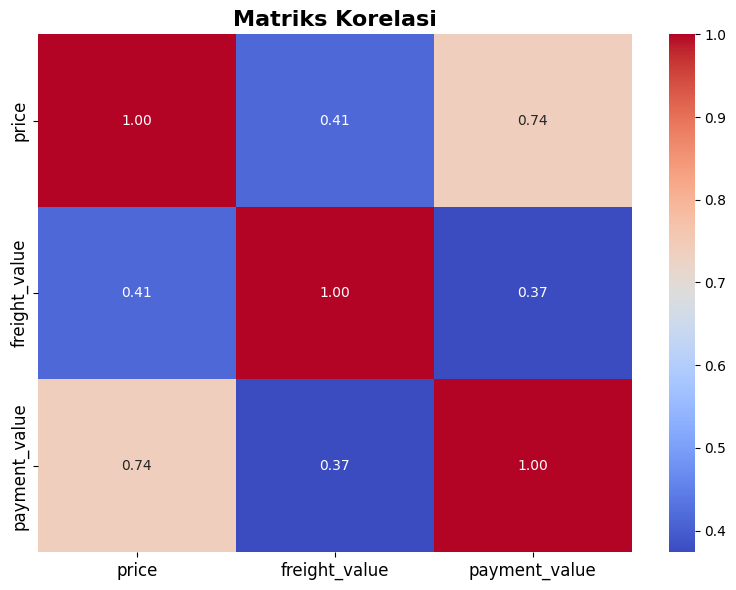

In [16]:
# Matriks korelasi
correlation_matrix = df[['price', 'freight_value', 'payment_value']].corr()

# Heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

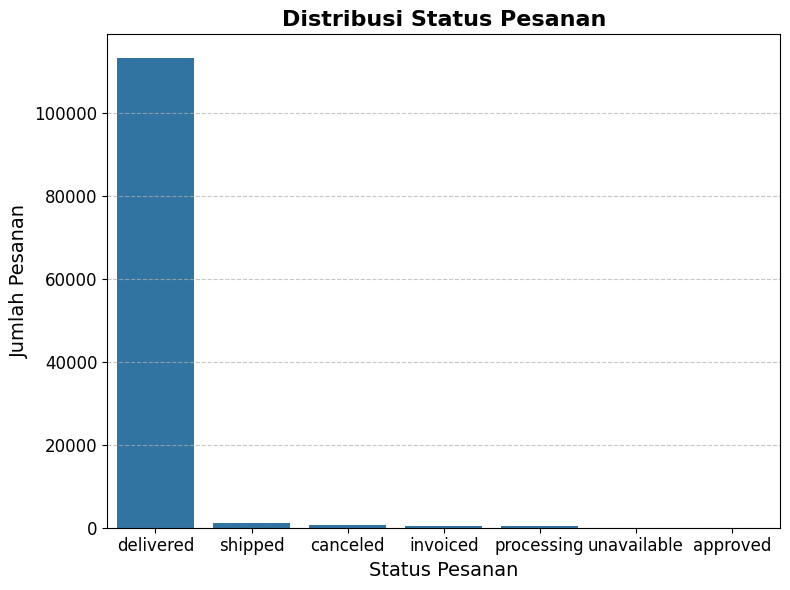

In [17]:
# Distribusi status pesanan
order_status_distribution = df['order_status'].value_counts()

# Visualisasi
plt.figure(figsize=(8, 6))
sns.barplot(x=order_status_distribution.index, y=order_status_distribution.values)
plt.title('Distribusi Status Pesanan', fontsize=16, fontweight='bold')
plt.xlabel('Status Pesanan', fontsize=14)
plt.ylabel('Jumlah Pesanan', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

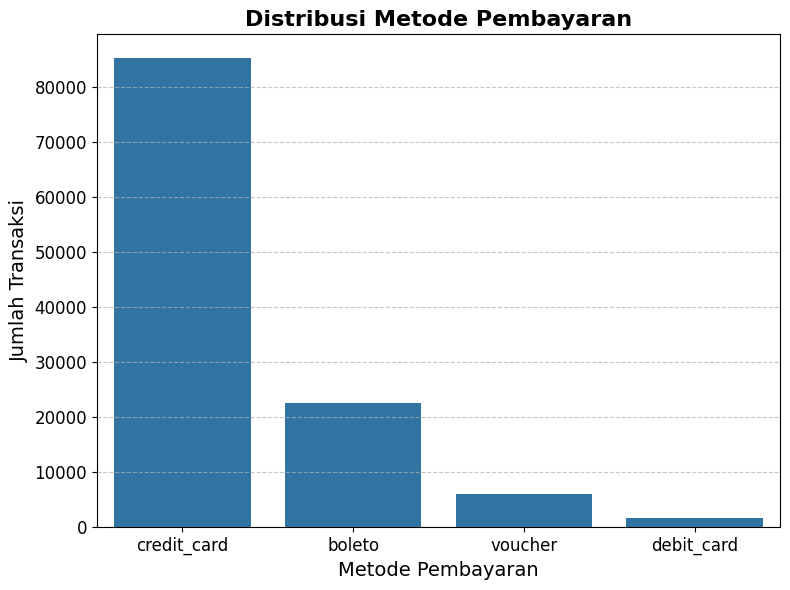

In [18]:
# Distribusi metode pembayaran
payment_methods = df['payment_type'].value_counts()

# Visualisasi
plt.figure(figsize=(8, 6))
sns.barplot(x=payment_methods.index, y=payment_methods.values)
plt.title('Distribusi Metode Pembayaran', fontsize=16, fontweight='bold')
plt.xlabel('Metode Pembayaran', fontsize=14)
plt.ylabel('Jumlah Transaksi', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Insight:**
- Korelasi antara price dan payment_value cukup tinggi, menunjukkan bahwa harga produk memengaruhi total pembayaran.
- Sebagian besar pesanan berstatus delivered
- Metode pembayaran paling populer adalah credit_card, diikuti oleh boleto.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

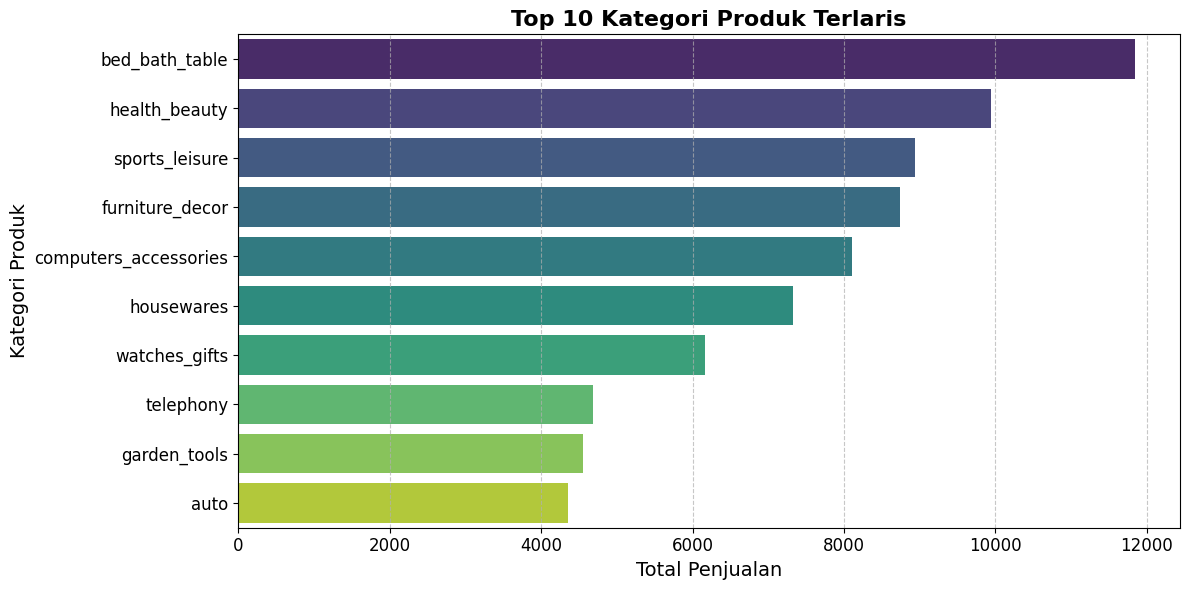

In [19]:
# Menghitung total penjualan per kategori produk
top_products = df['product_category_name_english'].value_counts().reset_index()

# Mengurutkan dari yang terbesar
top_products = top_products.sort_values(by='count', ascending=False)

# Menampilkan 10 kategori produk terlaris
top_10_products = top_products.head(10)

# Visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='product_category_name_english', data=top_10_products, hue='product_category_name_english',palette='viridis')
plt.title('Top 10 Kategori Produk Terlaris', fontsize=16, fontweight='bold')
plt.xlabel('Total Penjualan', fontsize=14)
plt.ylabel('Kategori Produk', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Pertanyaan 2:

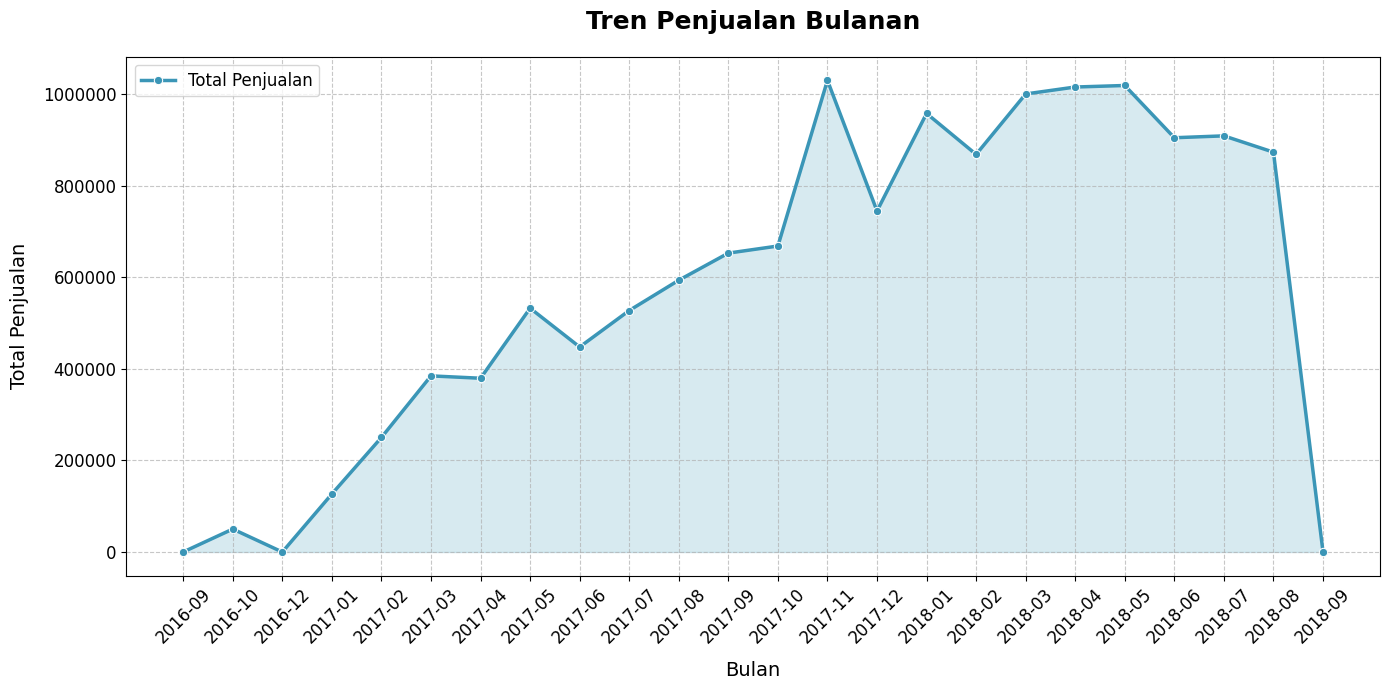

In [20]:
# Tren penjualan bulanan
# Kelompokkan data berdasarkan bulan dan hitung total penjualan
monthly_sales = df.groupby(df['order_purchase_timestamp'].dt.to_period('M')).agg({'price': 'sum'})

# Atur ukuran gambar untuk visibilitas yang lebih baik
plt.figure(figsize=(14, 7))

# Atur palette warna untuk Seaborn
colors = ["#26536f", "#3b96b7", "#749ca8", "#b6a98d", "#c78a4d", "#854927"]
sns.set_palette(colors)

# Plot data dengan warna kustom menggunakan lineplot dari Seaborn
sns.lineplot(data=monthly_sales, x=monthly_sales.index.astype(str), y='price',
             marker='o', linestyle='-', color=colors[1], linewidth=2.5, label='Total Penjualan')

# Tambahkan area di bawah garis untuk efek visual yang lebih menarik
plt.fill_between(monthly_sales.index.astype(str), monthly_sales['price'], color=colors[1], alpha=0.2)

# Tambahkan judul dan label
plt.title('Tren Penjualan Bulanan', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Bulan', fontsize=14, labelpad=10)
plt.ylabel('Total Penjualan', fontsize=14, labelpad=10)

# Hapus format scientific notation pada sumbu y
plt.ticklabel_format(style='plain', axis='y')

# Sesuaikan ticks (label sumbu)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Tambahkan gridlines untuk memudahkan pembacaan
plt.grid(visible=True, linestyle='--', alpha=0.7)

# Tambahkan legenda
plt.legend(loc='upper left', fontsize=12)

# Tampilkan plot
plt.tight_layout()
plt.show()

**Insight:**
- Penjualan mengalami tren naik dalam jangka panjang.
- Produk rumah tangga, kecantikan, dan olahraga memiliki pangsa pasar yang besar.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
    - Kategori produk terlaris adalah bed_bath_table, health_beauty, dan sports_leisure.

    - Produk-produk ini memiliki pangsa pasar yang besar dan menjadi fokus utama pelanggan.
- Conclution pertanyaan 2
    - Kategori bed_bath_table adalah yang paling laris, jauh melampaui kategori lain. Ini bisa menunjukkan bahwa produk rumah tangga seperti peralatan kamar mandi dan tempat tidur memiliki permintaan yang tinggi.
    - Health & beauty berada di posisi kedua, menunjukkan bahwa produk kecantikan dan kesehatan juga menjadi favorit konsumen.